In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.utils import all_estimators 
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.inspection import permutation_importance
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [10]:
#df = pd.read_csv('enhanced_anxiety_dataset.csv')
# df = pd.read_csv('resapled.csv')
df = pd.read_csv('OriginalFeaturesAdded.csv')
target_column = 'Anxiety Level (1-10)'

print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
print("Target column:", target_column)

Total rows: 11000
Total columns: 23
Target column: Anxiety Level (1-10)


In [4]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Caffeine_Sleep_Ratio,Heart_Breathing_Ratio,Diet_Quality_Binary,Active_Therapy
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,...,No,Yes,3,Yes,7,5.0,30.166667,8.142857,1,1
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,...,Yes,No,2,No,8,3.0,32.258065,2.695652,1,1
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,...,No,No,1,Yes,1,1.0,23.400000,3.250000,0,0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,...,No,No,0,No,1,2.0,62.068966,5.058824,0,0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,...,Yes,Yes,1,No,3,1.0,30.121951,5.157895,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [59]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
Caffeine_Sleep_Ratio                 0
Heart_Breathing_Ratio                0
Diet_Quality_Binary                  0
Active_Therapy                       0
dtype: int64

In [6]:
def unic_columns(data):
    object_columns = data.select_dtypes(include='object').columns
    for column in object_columns:
        print(f"Унікальні значення в колонці: '{column}' : ")
        print(data[column].value_counts())
        print("-" * 50)

unic_columns(df)

Унікальні значення в колонці: 'Gender' : 
Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64
--------------------------------------------------
Унікальні значення в колонці: 'Occupation' : 
Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64
--------------------------------------------------
Унікальні значення в колонці: 'Smoking' : 
Smoking
Yes    5779
No     5221
Name: count, dtype: int64
--------------------------------------------------
Унікальні значення в колонці: 'Family History of Anxiety' : 
Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64
--------------------------------------------------
Унікальні значення в колонці: 'Dizziness' : 
Dizziness
Yes    5672
No     5328
Name: count, dtype: int64
----------------

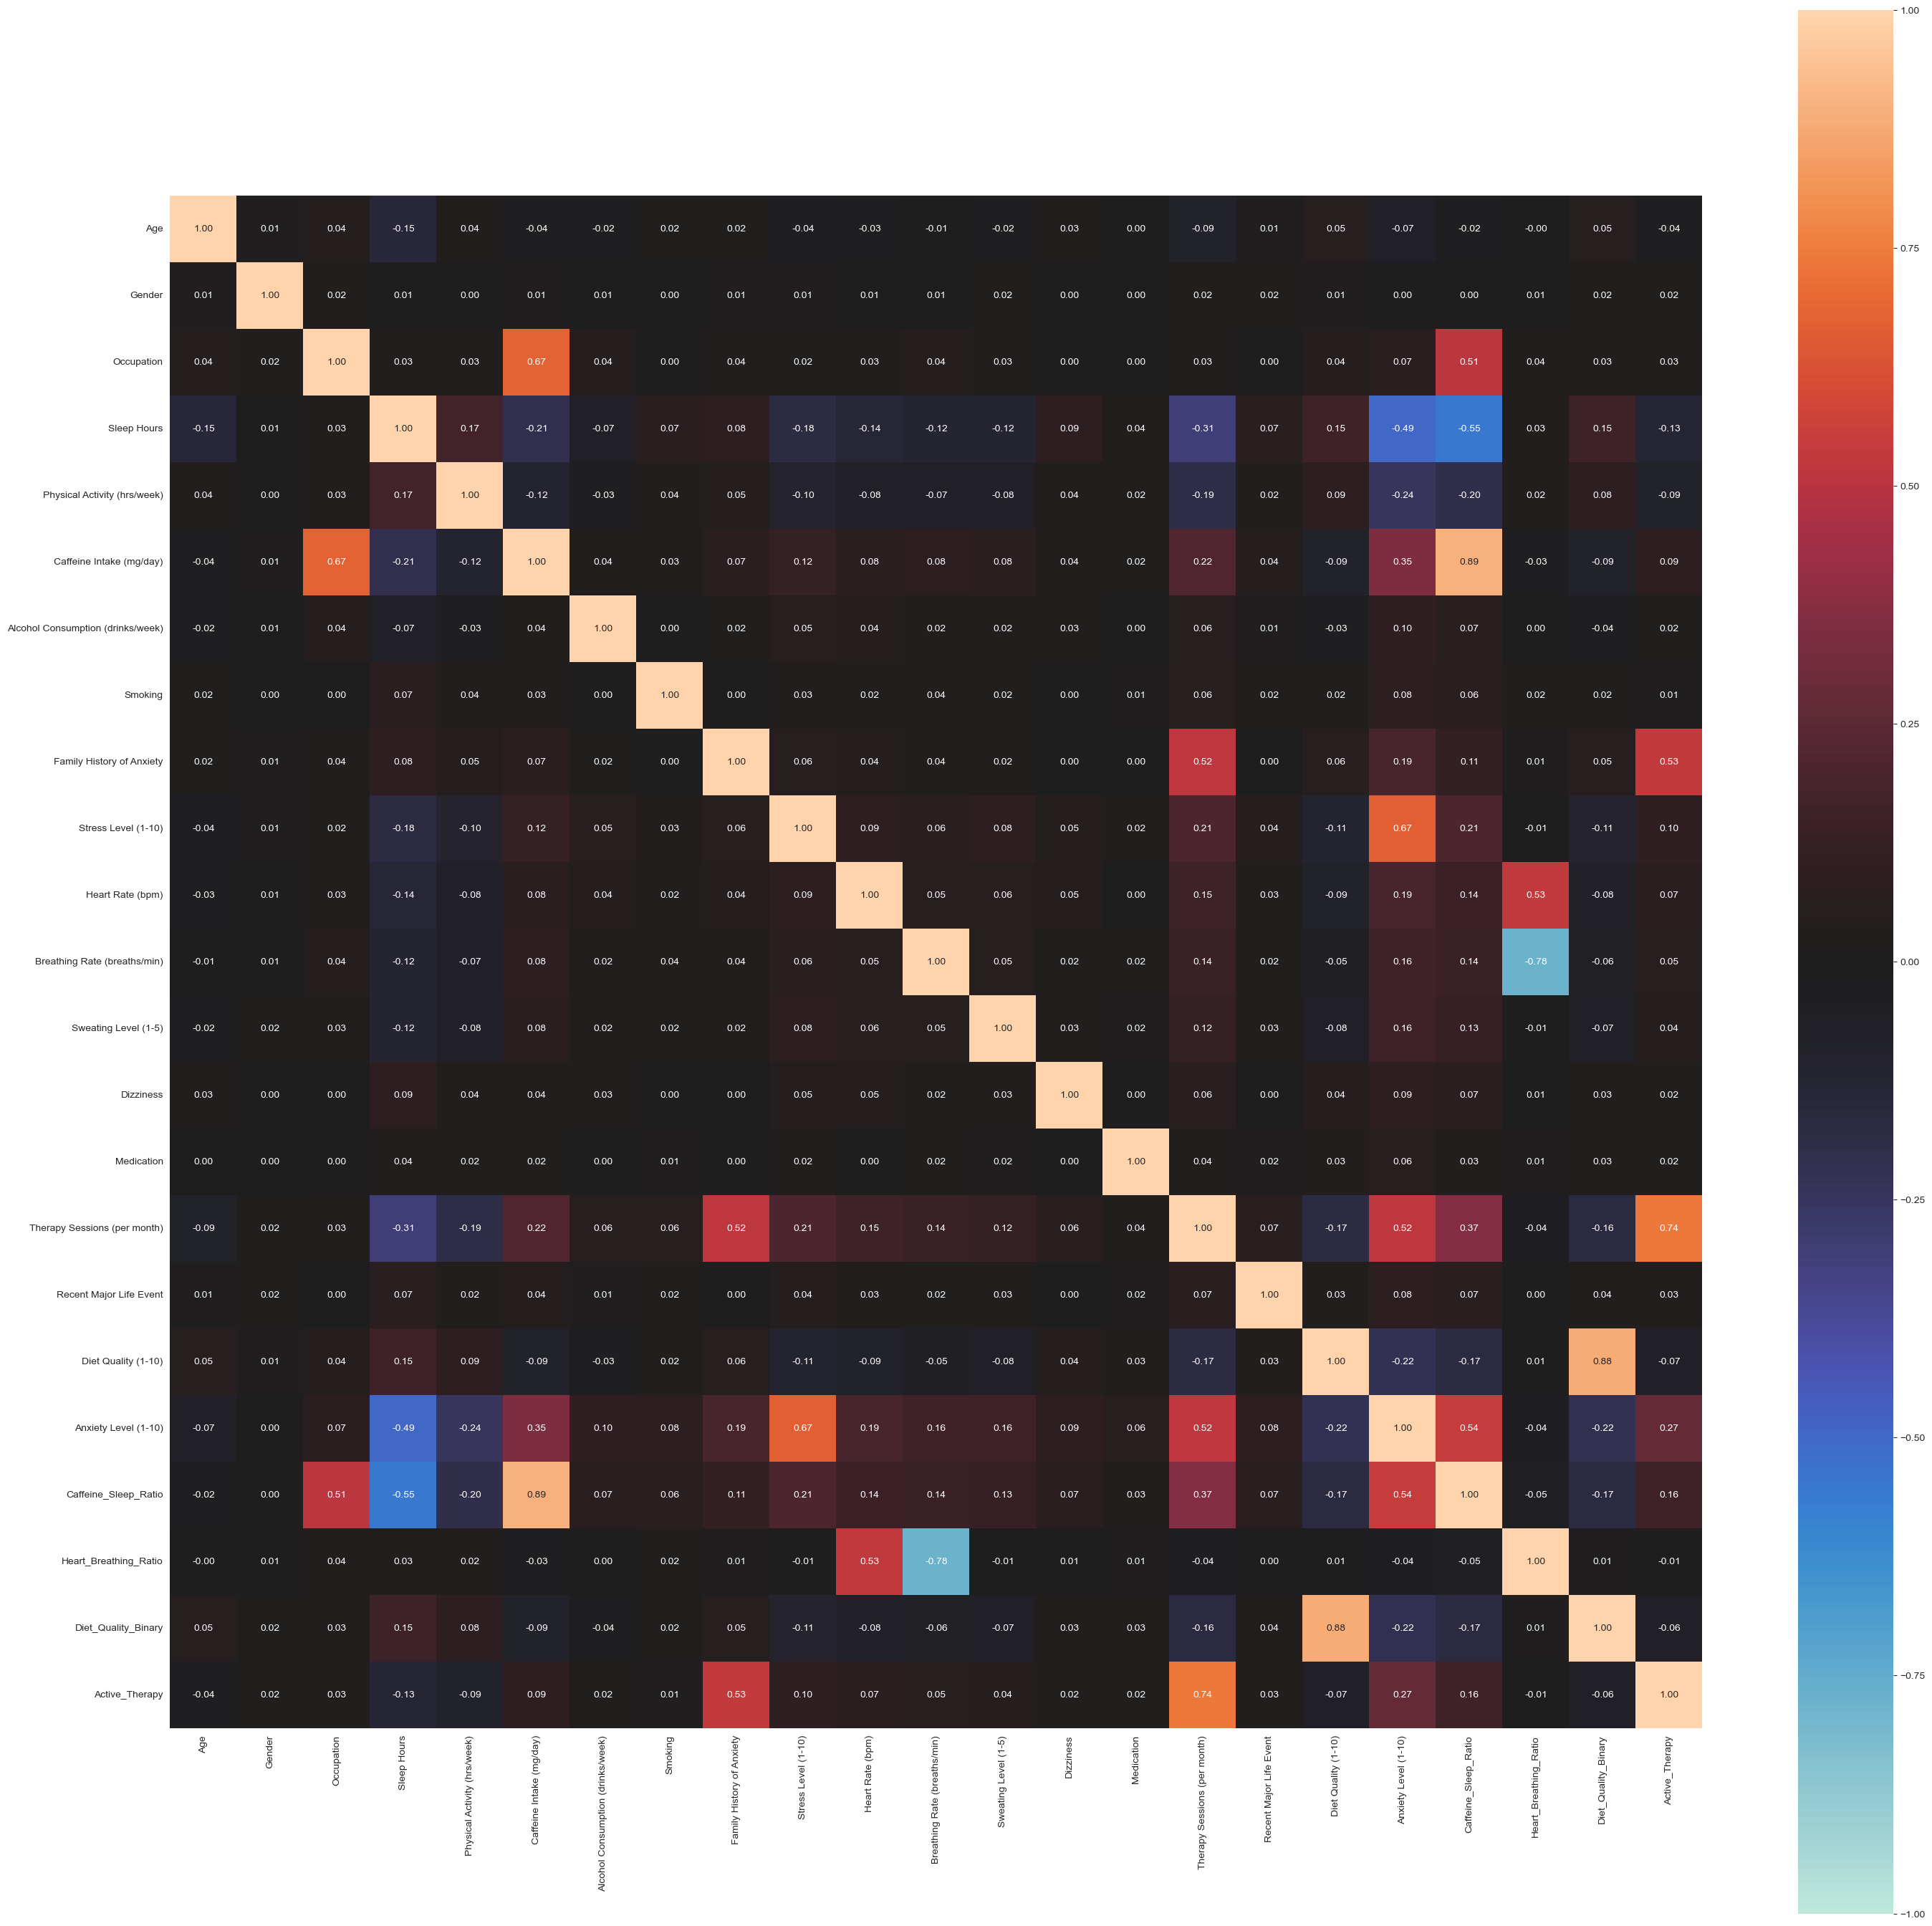

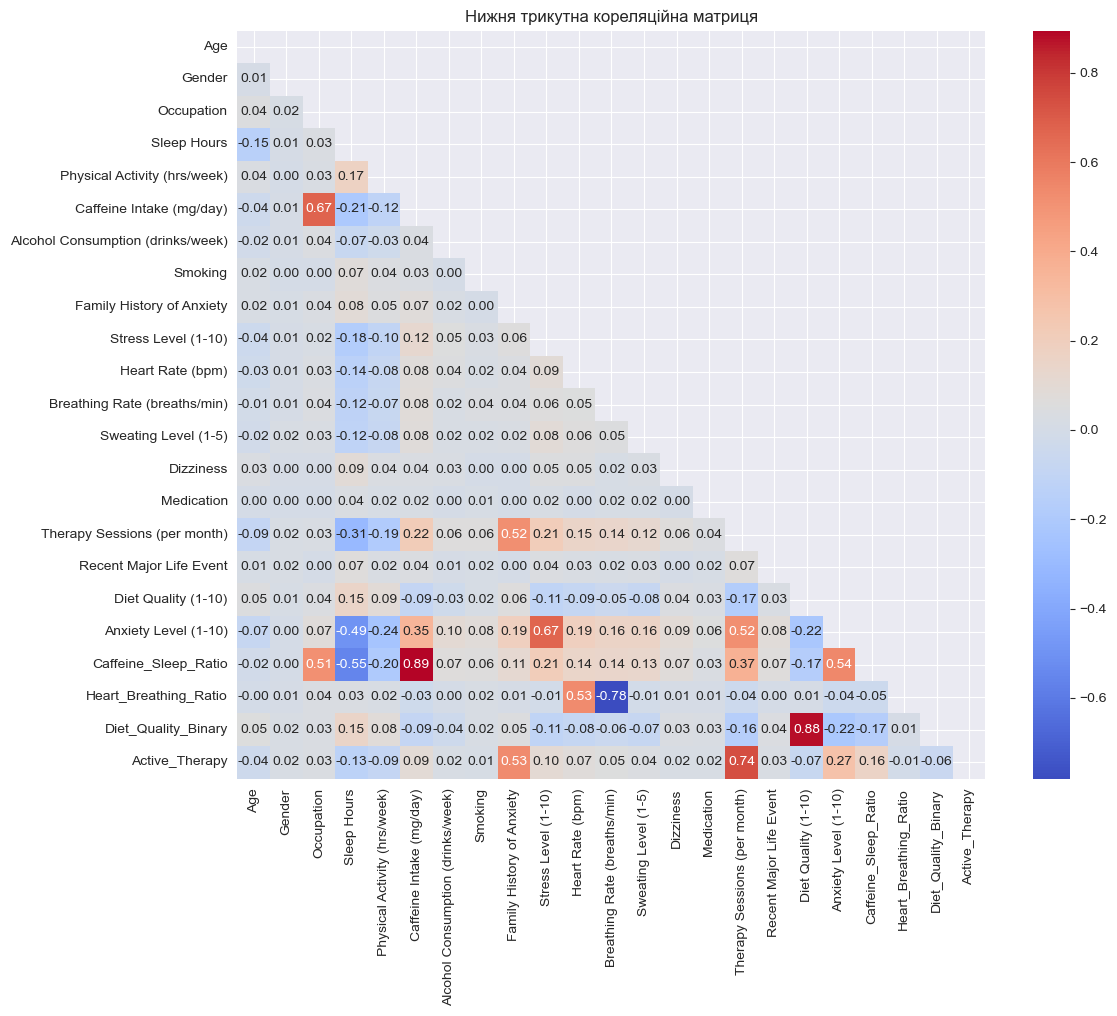


Висококорельовані пари ознак:
Caffeine_Sleep_Ratio - Caffeine Intake (mg/day) --> кореляція 0.89
Diet_Quality_Binary - Diet Quality (1-10) --> кореляція 0.88

Коефіцієнт кореляції відносно цільового поля Active_Therapy
                                   Correlations
Active_Therapy                         1.000000
Therapy Sessions (per month)           0.738809
Family History of Anxiety              0.531714
Anxiety Level (1-10)                   0.273458
Caffeine_Sleep_Ratio                   0.160789
Sleep Hours                           -0.126867
Stress Level (1-10)                    0.101136
Caffeine Intake (mg/day)               0.093492
Physical Activity (hrs/week)          -0.088766
Diet Quality (1-10)                   -0.073181
Heart Rate (bpm)                       0.070517
Diet_Quality_Binary                   -0.063957
Breathing Rate (breaths/min)           0.053258
Sweating Level (1-5)                   0.039124
Age                                   -0.035129
Occupation  

In [60]:
def corr_dif(data, threshold=0.85):
    correlation_matrix = associations(data)
    
    def plot_lower_triangle_corr_matrix(corr_matrix):
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        plt.figure(figsize=(12, 10))  
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True)
        plt.title("Нижня трикутна кореляційна матриця")
        plt.tight_layout()
        plt.show()
        
    plot_lower_triangle_corr_matrix(correlation_matrix['corr'])
    
    def get_highly_correlated_pairs(corr_matrix, threshold=0.85):
        corr_pairs = []
        cols = corr_matrix.columns
        for i in range(len(cols)):
            for j in range(i):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) >= threshold:
                    corr_pairs.append((cols[i], cols[j], corr_value))
        return sorted(corr_pairs, key=lambda x: -abs(x[2]))
    
    highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix['corr'], threshold)
    
    print("\nВисококорельовані пари ознак:")
    for col1, col2, value in highly_correlated_pairs:
        print(f"{col1} - {col2} --> кореляція {value:.2f}")
        
    target_correlations = correlation_matrix['corr'].iloc[:, -1]
    target_col = target_correlations.name
    
    corr_df = target_correlations.to_frame()
    corr_df.columns = ['Correlations']
    corr_df['Abs Correlation'] = corr_df['Correlations'].abs()
    sorted_corr_df = corr_df.sort_values(by='Abs Correlation', ascending=False)
    sorted_corr_df = sorted_corr_df.drop(columns=['Abs Correlation'])
    print(f"\nКоефіцієнт кореляції відносно цільового поля {target_col}")
    pd.set_option('display.max_rows', None)
    print(sorted_corr_df)
    
    return correlation_matrix

correlation_result = corr_dif(df, 0.8)

In [8]:
df_2 = df.copy()

In [5]:
target_original = 'Anxiety Level (1-10)'
def categorize_anxiety(level):
    level = int(level) if isinstance(level, str) else level
    if level <= 3:
        return 'Low'
    elif 3 < level <= 6:
        return 'Medium'
    else: 
        return 'High'

df['Anxiety Class'] = df[target_original].apply(categorize_anxiety).astype('category')
target_col = 'Anxiety Class'
df = df.drop(columns=[target_original])

numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"Числові колонки ({len(numeric_cols)}): {numeric_cols}")
print(f"Категоріальні колонки ({len(categorical_cols)}): {categorical_cols}")
print(f"Цільова змінна: {target_col}")

Числові колонки (15): ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Caffeine_Sleep_Ratio', 'Heart_Breathing_Ratio', 'Diet_Quality_Binary', 'Active_Therapy']
Категоріальні колонки (7): ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
Цільова змінна: Anxiety Class


In [6]:
label_encoders = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"Закодовано {col}: {len(le.classes_)} унікальних значень")

le_y = LabelEncoder()
y = le_y.fit_transform(df[target_col])
print(f"\nКласи цільової змінної: {le_y.classes_}")
print(f"Розподіл класів: {np.bincount(y)}")

Закодовано Gender: 3 унікальних значень
Закодовано Occupation: 13 унікальних значень
Закодовано Smoking: 2 унікальних значень
Закодовано Family History of Anxiety: 2 унікальних значень
Закодовано Dizziness: 2 унікальних значень
Закодовано Medication: 2 унікальних значень
Закодовано Recent Major Life Event: 2 унікальних значень

Класи цільової змінної: ['High' 'Low' 'Medium']
Розподіл класів: [1137 5202 4661]


In [7]:
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Масштабування числових ознак завершено")
print(f"Середнє значення після масштабування:\n{df_encoded[numeric_cols].mean()}")
print(f"\nСтандартне відхилення після масштабування:\n{df_encoded[numeric_cols].std()}")

Масштабування числових ознак завершено
Середнє значення після масштабування:
Age                                 -1.395248e-16
Sleep Hours                         -1.007679e-16
Physical Activity (hrs/week)        -7.363807e-17
Caffeine Intake (mg/day)             1.740830e-16
Alcohol Consumption (drinks/week)   -1.085193e-16
Stress Level (1-10)                 -3.681903e-17
Heart Rate (bpm)                     1.847411e-16
Breathing Rate (breaths/min)         2.280196e-16
Sweating Level (1-5)                -1.508288e-16
Therapy Sessions (per month)         5.684342e-17
Diet Quality (1-10)                  2.906766e-17
Caffeine_Sleep_Ratio                 5.878126e-17
Heart_Breathing_Ratio               -2.838941e-16
Diet_Quality_Binary                  7.105427e-18
Active_Therapy                       1.295126e-16
dtype: float64

Стандартне відхилення після масштабування:
Age                                  1.000045
Sleep Hours                          1.000045
Physical Activity (hrs

In [8]:
X = df_encoded.drop(columns=[target_col])
n_classes = len(np.unique(y))
is_multiclass = n_classes > 2

print(f"Кількість класів: {n_classes}")
print(f"Мультикласова класифікація: {is_multiclass}")

X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРозмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")
print(f"Розподіл класів у тренувальній вибірці: {np.bincount(y_train)}")
print(f"Розподіл класів у тестовій вибірці: {np.bincount(y_test)}")

Кількість класів: 3
Мультикласова класифікація: True

Розмір тренувальної вибірки: (8800, 22)
Розмір тестової вибірки: (2200, 22)
Розподіл класів у тренувальній вибірці: [ 910 4161 3729]
Розподіл класів у тестовій вибірці: [ 227 1041  932]


In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.utils import all_estimators
import numpy as np
import pandas as pd

# Set up StratifiedKFold and classifiers
classifiers = all_estimators(type_filter='classifier')
skip_models = ['GaussianProcessClassifier']
results = {}

print(f"Тестування різних класифікаторів з кросвалідацією (5 фолдів)")
print("=" * 80)

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Check if the dataset is multiclass
is_multiclass = len(np.unique(y_train)) > 2
n_classes = len(np.unique(y_train))

for name, ClassifierClass in classifiers:
    if name in skip_models:
        continue
    try:
        model = ClassifierClass()
        
        # Cross-validation for precision scoring
        scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='precision_macro', n_jobs=-1)  # 'precision_macro' for multiclass
        model.fit(X_train, y_train)
        
        # Initialize roc_auc as NaN
        roc_auc = np.nan
        
        # Calculate ROC AUC if possible
        if hasattr(model, 'predict_proba'):
            pred_proba = model.predict_proba(X_train)
            if is_multiclass:
                if pred_proba.ndim == 2 and pred_proba.shape[1] == n_classes:
                    roc_auc = roc_auc_score(y_train, pred_proba, multi_class='ovr')
                else:
                    roc_auc = np.nan
            else:
                if pred_proba.ndim == 2 and pred_proba.shape[1] == 2:
                    roc_auc = roc_auc_score(y_train, pred_proba[:, 1])
                elif pred_proba.ndim == 1:
                    roc_auc = roc_auc_score(y_train, pred_proba)
                else:
                    roc_auc = np.nan
        elif hasattr(model, 'decision_function'):
            pred_score = model.decision_function(X_train)
            if is_multiclass:
                if pred_score.ndim == 2 and pred_score.shape[1] == n_classes:
                    roc_auc = roc_auc_score(y_train, pred_score, multi_class='ovr')
                else:
                    roc_auc = np.nan
            else:
                if pred_score.ndim == 1:
                    roc_auc = roc_auc_score(y_train, pred_score)
                elif pred_score.ndim == 2 and pred_score.shape[1] == 2:
                    roc_auc = roc_auc_score(y_train, pred_score[:, 1])
                else:
                    roc_auc = np.nan
        else:
            roc_auc = np.nan
        
        # Store results if no NaN in precision
        if not np.isnan(scores.mean()):
            results[name] = {
                'mean_precision': scores.mean(),
                'std_dev': scores.std(),
                'roc_auc': roc_auc,
            }
            print(f"{name}: MEAN PRECISION {scores.mean():.3f}, STD (± {scores.std():.3f}), ROC AUC: {roc_auc:.3f}")
        else:
            print(f"{name}: Пропущено через NaN у результаті")

    except Exception as e:
        print(f"{name} failed: {str(e)}")
        continue

# Sort results by mean precision and print top 10
sorted_results = sorted(results.items(), key=lambda x: x[1]['mean_precision'], reverse=True)

print("\nТоп-10 найбільш точних моделей:")
for i, (name, metric) in enumerate(sorted_results[:10], 1):
    print(f"{i:2d}. {name:40s} | PRECISION: {metric['mean_precision']:.3f} (± {metric['std_dev']:.3f}) | ROC-AUC: {metric['roc_auc']:.3f}")

# Create a DataFrame to present the results in tabular form
results_df = pd.DataFrame.from_dict(results, orient='index')


Тестування різних класифікаторів з кросвалідацією (5 фолдів)
AdaBoostClassifier: MEAN PRECISION 0.797, STD (± 0.009), ROC AUC: 0.821
BaggingClassifier: MEAN PRECISION 0.809, STD (± 0.012), ROC AUC: 0.999
BernoulliNB: MEAN PRECISION 0.774, STD (± 0.006), ROC AUC: 0.878
CalibratedClassifierCV: MEAN PRECISION 0.829, STD (± 0.009), ROC AUC: 0.902
CategoricalNB failed: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\envs\DataAnalysis\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\envs\DataAnalysis\Lib\site-packages\sklearn\naive_bayes.py", line 1388, in fit
    return super().f

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score

# Define the models
models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('gdbt', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('qda', QuadraticDiscriminantAnalysis())
]

# Create the Voting Classifier using soft voting
voting_model = VotingClassifier(estimators=models, voting='soft')

# Fit the voting model to the training data
voting_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = voting_model.predict(X_test)

# Calculate the precision of the voting model
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
print(f"Precision of the Voting Model: {precision:.3f}")


Precision of the Voting Model: 0.853


In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score

# Base models for the stacking ensemble
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('gdbt', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('qda', QuadraticDiscriminantAnalysis())
]

# Meta-model (the model that combines the base model predictions)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the StackingClassifier with base models and meta-model
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit the stacked model to the training data
stacked_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = stacked_model.predict(X_test)

# Calculate the precision of the stacked model
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
print(f"Precision of the Stacked Model: {precision:.3f}")


Precision of the Stacked Model: 0.862


In [49]:
param_grids = {
    "QuadraticDiscriminantAnalysis": {
        'reg_param': [0.0, 0.1, 0.2, 0.3, 0.5, 0.7],
        'store_covariance': [True, False],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    "LinearDiscriminantAnalysis": {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9],
        'tol': [1e-4, 1e-3],
        'regularization': [None, 'l2', 'l1']
    },
    "LogisticRegressionCV": {
        'Cs': [10, 20],
        'max_iter': [1000, 2000, 3000],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'penalty': ['l2', 'l1'],
        'cv': [3, 5]
    },
    "GaussianNB": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    "MLPClassifier": { 
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [500, 1000]
    },
    "RandomForestClassifier": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "LogisticRegression": {
        'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'max_iter': [1000, 2000],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'penalty': ['l2', 'l1'],
        'class_weight': [None, 'balanced']
    },
    "ExtraTreesClassifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "CalibratedClassifierCV": {
        'method': ['sigmoid', 'isotonic'],
        'cv': [3, 5]
    },
    "HistGradientBoostingClassifier": {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 10, 15, None],
        'max_iter': [100, 200, 300],
    },
    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [20, 30, 40, 50],
        'p': [1, 2]
    },
    "DecisionTreeClassifier": {
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

print("Гіперпараметри підготовлені для наступних моделей:")
for model_name in param_grids.keys():
    print(f"  - {model_name}: {len(param_grids[model_name])} параметрів")


Гіперпараметри підготовлені для наступних моделей:
  - QuadraticDiscriminantAnalysis: 3 параметрів
  - LinearDiscriminantAnalysis: 4 параметрів
  - LogisticRegressionCV: 5 параметрів
  - GaussianNB: 1 параметрів
  - MLPClassifier: 5 параметрів
  - RandomForestClassifier: 6 параметрів
  - GradientBoostingClassifier: 5 параметрів
  - LogisticRegression: 5 параметрів
  - ExtraTreesClassifier: 5 параметрів
  - CalibratedClassifierCV: 2 параметрів
  - HistGradientBoostingClassifier: 3 параметрів
  - AdaBoostClassifier: 3 параметрів
  - KNeighborsClassifier: 5 параметрів
  - DecisionTreeClassifier: 5 параметрів


In [50]:
top_10_classifiers = sorted_results[:10]
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
feature_names = X_train.columns
feature_importance_dict = {}
tuned_results = {}

print("Початок підбору гіперпараметрів для Top-10 моделей")
print("=" * 80)

for name, _ in top_10_classifiers:
    print(f"\n{'='*80}")
    print(f"Обробка моделі: {name}")
    print(f"{'='*80}")
    
    ClassifierClass = dict(classifiers)[name]
    base_model = ClassifierClass()
    
    if name in param_grids:
        param_grid = param_grids[name]
        print(f"Підбір гіперпараметрів: {len(param_grid)} параметрів")
        print(f"Параметри: {list(param_grid.keys())}")
        
        try:
            grid_search = GridSearchCV(
                base_model, 
                param_grid, 
                cv=CV, 
                scoring='accuracy', 
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_idx = grid_search.best_index_
            mean_score = grid_search.cv_results_['mean_test_score'][best_idx]
            std_score = grid_search.cv_results_['std_test_score'][best_idx]
        except Exception as e:
            print(f"Помилка GridSearch: {e}")
            print("Використовується модель за замовчуванням")
            best_model = base_model
            best_model.fit(X_train, y_train)
            best_params = "Параметри за замовчуванням"
            scores = cross_val_score(best_model, X_train, y_train, cv=CV, scoring='accuracy')
            mean_score = scores.mean()
            std_score = scores.std()
    else:
        print(f"Гіперпараметри не визначені, використовується модель за замовчуванням")
        best_model = base_model
        best_model.fit(X_train, y_train)
        best_params = "Параметри за замовчуванням"
        scores = cross_val_score(best_model, X_train, y_train, cv=CV, scoring='accuracy')
        mean_score = scores.mean()
        std_score = scores.std()
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    if hasattr(best_model, 'predict_proba'):
        proba_test = best_model.predict_proba(X_test)
        if is_multiclass:
            if proba_test.ndim == 2 and proba_test.shape[1] == n_classes:
                roc_auc_test = roc_auc_score(y_test, proba_test, multi_class='ovr')
            else:
                roc_auc_test = np.nan
        else:
            if proba_test.ndim == 2 and proba_test.shape[1] == 2:
                roc_auc_test = roc_auc_score(y_test, proba_test[:, 1])
            elif proba_test.ndim == 1:
                roc_auc_test = roc_auc_score(y_test, proba_test)
            else:
                roc_auc_test = np.nan
    elif hasattr(best_model, 'decision_function'):
        proba_test = best_model.decision_function(X_test)
        if is_multiclass:
            if proba_test.ndim == 2 and proba_test.shape[1] == n_classes:
                roc_auc_test = roc_auc_score(y_test, proba_test, multi_class='ovr')
            else:
                roc_auc_test = np.nan
        else:
            if proba_test.ndim == 1:
                roc_auc_test = roc_auc_score(y_test, proba_test)
            elif proba_test.ndim == 2 and proba_test.shape[1] == 2:
                roc_auc_test = roc_auc_score(y_test, proba_test[:, 1])
            else:
                roc_auc_test = np.nan
    else:
        roc_auc_test = np.nan
    
    tuned_results[name] = {
        'best_params': best_params,
        'cv_mean_score': mean_score,
        'cv_std_score': std_score,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'roc_auc_test': roc_auc_test,
        'model': best_model
    }
    
    print(f"\n{'─'*80}")
    print(f"Результати для {name}:")
    print(f"{'─'*80}")
    print(f"Найкращі параметри: {best_params}")
    print(f"CV Accuracy: {mean_score:.4f} (± {std_score:.4f})")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test ROC-AUC: {roc_auc_test:.4f}")
    
    y_pred_full = best_model.predict(X)
    df_2[f'{name}_prediction'] = le_y.inverse_transform(y_pred_full)
    
    print(f"\n{'─'*80}")
    print(f"Важливість ознак для {name}:")
    print(f"{'─'*80}")
    
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance_dict[name] = importances
        sort_idx = np.argsort(importances)[::-1]
        print("Топ-10 найважливіших ознак:")
        for i, idx in enumerate(sort_idx[:10], 1):
            print(f"{i:2d}. {feature_names[idx]:30s}: {importances[idx]:.4f}")
    else:
        print("Обчислення Permutation Importance...")
        perm_importances = permutation_importance(
            best_model, X_test, y_test, 
            n_repeats=10, 
            random_state=42,
            n_jobs=-1
        )
        importances = perm_importances.importances_mean
        feature_importance_dict[name] = importances
        sort_idx = np.argsort(importances)[::-1]
        print("Топ-10 найважливіших ознак:")
        for i, idx in enumerate(sort_idx[:10], 1):
            print(f"{i:2d}. {feature_names[idx]:30s}: {importances[idx]:.4f}")

print("\n" + "="*80)
print("Підбір гіперпараметрів завершено!")
print("="*80)

Початок підбору гіперпараметрів для Top-10 моделей

Обробка моделі: LogisticRegressionCV
Підбір гіперпараметрів: 5 параметрів
Параметри: ['Cs', 'max_iter', 'solver', 'penalty', 'cv']
Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 


ПІДСУМКОВЕ ПОРІВНЯННЯ МОДЕЛЕЙ
                         Model  CV Accuracy   CV Std  Train Accuracy  Test Accuracy  ROC-AUC Test  Overfit (Train-Test)
            LogisticRegression     0.787273 0.007620        0.788295       0.809091      0.919077             -0.020795
    LinearDiscriminantAnalysis     0.783182 0.006178        0.784659       0.808182      0.919158             -0.023523
          LogisticRegressionCV     0.786250 0.007018        0.788409       0.807273      0.920839             -0.018864
                    GaussianNB     0.783864 0.006105        0.785341       0.805909      0.918472             -0.020568
 QuadraticDiscriminantAnalysis     0.785682 0.010274        0.789886       0.805455      0.919491             -0.015568
          ExtraTreesClassifier     0.784205 0.006707        0.845682       0.802727      0.919128              0.042955
    GradientBoostingClassifier     0.780682 0.004901        0.796136       0.801818      0.920441             -0.005682
        R

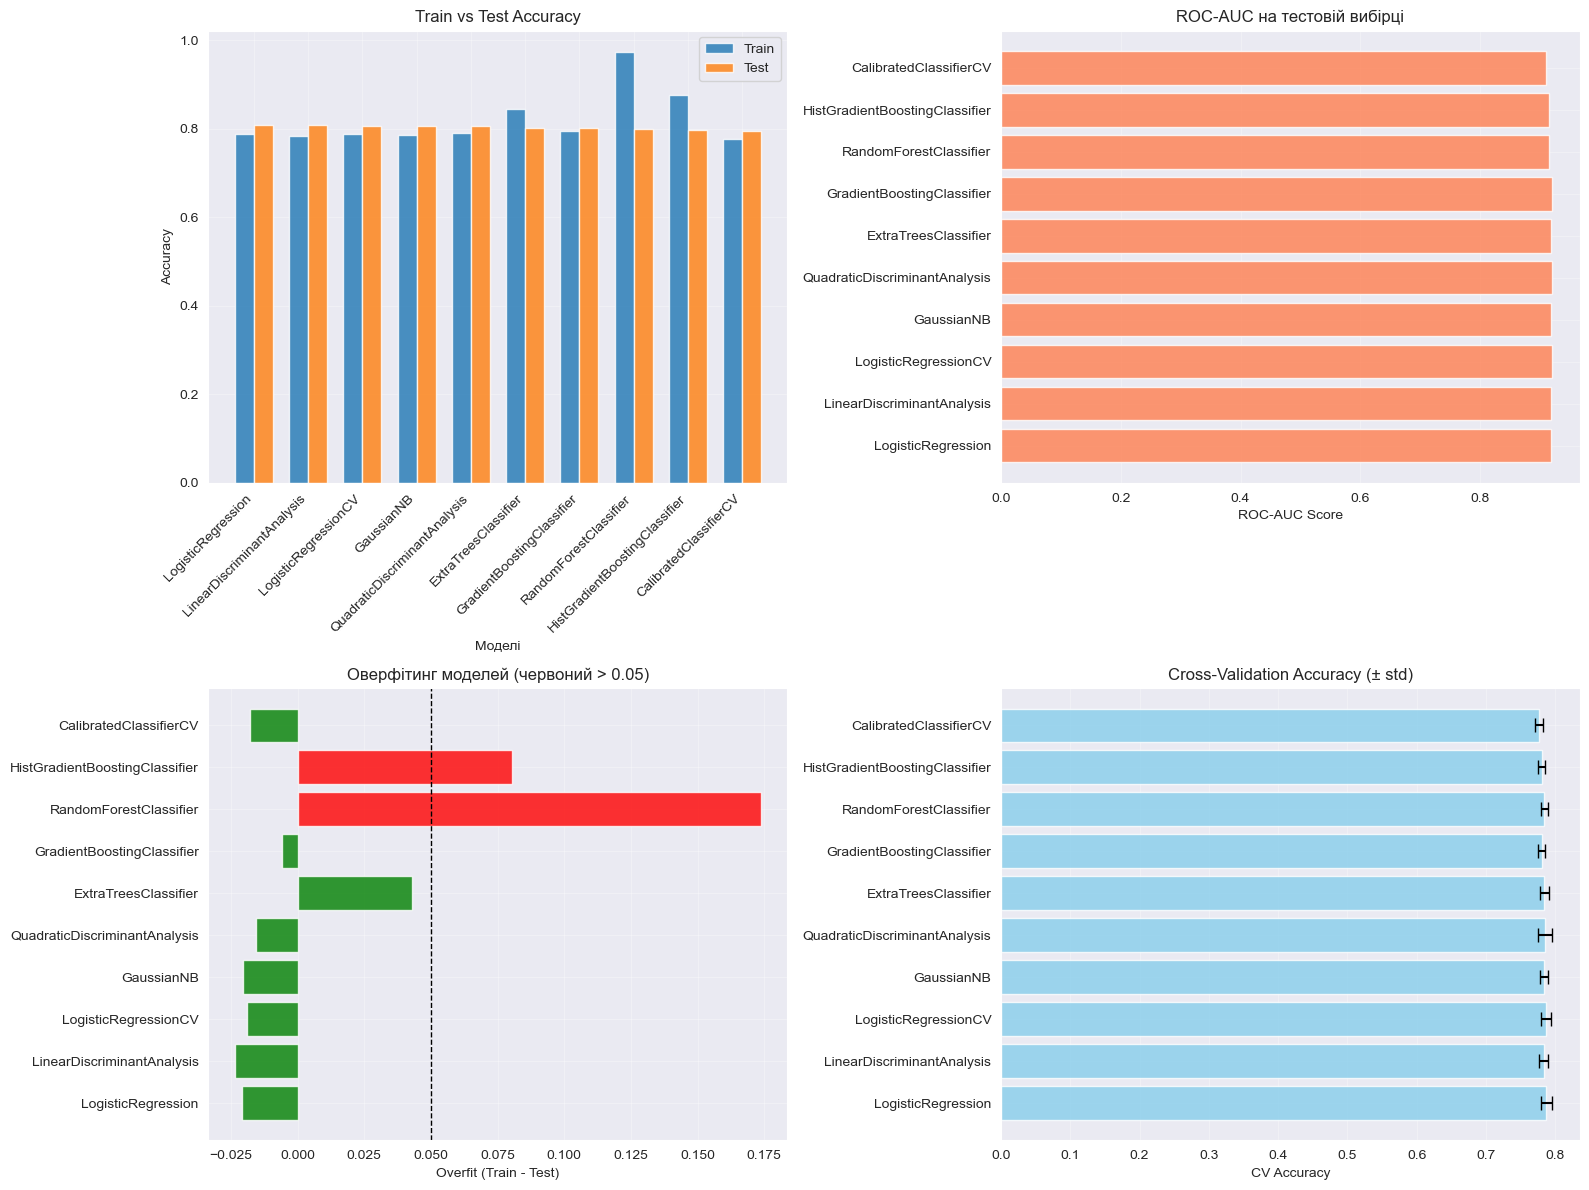

In [17]:
results_comparison = pd.DataFrame({
    'Model': list(tuned_results.keys()),
    'CVAccuracy': [tuned_results[m]['cv_mean_score'] for m in tuned_results],
    'CVStd': [tuned_results[m]['cv_std_score'] for m in tuned_results],
    'TrainAccuracy': [tuned_results[m]['train_accuracy'] for m in tuned_results],
    'TestAccuracy': [tuned_results[m]['test_accuracy'] for m in tuned_results],
    'ROC-AUCTest': [tuned_results[m]['roc_auc_test'] for m in tuned_results],
    'Overfit(Train-Test)': [tuned_results[m]['train_accuracy'] - tuned_results[m]['test_accuracy'] 
                              for m in tuned_results]
})

results_comparison = results_comparison.sort_values('Test Accuracy', ascending=False)

print("\n" + "="*80)
print("ПІДСУМКОВЕ ПОРІВНЯННЯ МОДЕЛЕЙ")
print("="*80)
print(results_comparison.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
models = results_comparison['Model']
x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, results_comparison['Train Accuracy'], width, label='Train', alpha=0.8)
ax1.bar(x + width/2, results_comparison['Test Accuracy'], width, label='Test', alpha=0.8)
ax1.set_xlabel('Моделі')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train vs Test Accuracy')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.barh(models, results_comparison['ROC-AUC Test'], alpha=0.8, color='coral')
ax2.set_xlabel('ROC-AUC Score')
ax2.set_title('ROC-AUC на тестовій вибірці')
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
colors = ['red' if x > 0.05 else 'green' for x in results_comparison['Overfit (Train-Test)']]
ax3.barh(models, results_comparison['Overfit (Train-Test)'], alpha=0.8, color=colors)
ax3.set_xlabel('Overfit (Train - Test)')
ax3.set_title('Оверфітинг моделей (червоний > 0.05)')
ax3.axvline(x=0.05, color='black', linestyle='--', linewidth=1)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.barh(models, results_comparison['CV Accuracy'], 
         xerr=results_comparison['CV Std'], 
         alpha=0.8, color='skyblue', capsize=5)
ax4.set_xlabel('CV Accuracy')
ax4.set_title('Cross-Validation Accuracy (± std)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Побудова ROC-кривих для Top-10 моделей...
  LogisticRegressionCV: AUC = 0.929 ± 0.003
  LogisticRegression: AUC = 0.928 ± 0.003
  QuadraticDiscriminantAnalysis: AUC = 0.929 ± 0.004
  GaussianNB: AUC = 0.929 ± 0.003
  LinearDiscriminantAnalysis: AUC = 0.929 ± 0.003
  RandomForestClassifier: AUC = 0.927 ± 0.003
  GradientBoostingClassifier: AUC = 0.928 ± 0.003
  CalibratedClassifierCV: AUC = 0.916 ± 0.003
  HistGradientBoostingClassifier: AUC = 0.927 ± 0.004
  ExtraTreesClassifier: AUC = 0.929 ± 0.002


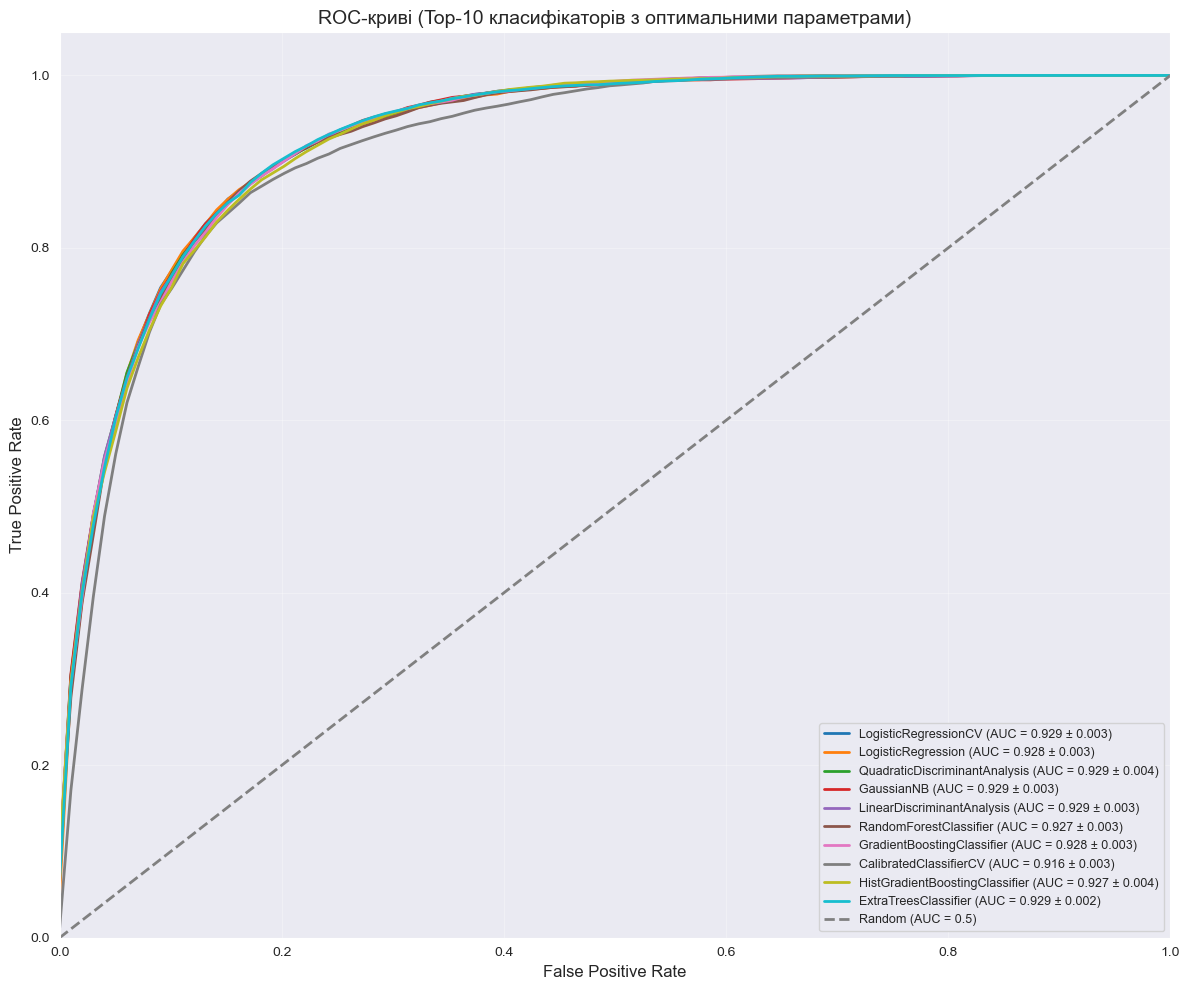

ROC-криві побудовано!


In [18]:
plt.figure(figsize=(12, 10))
mean_fpr = np.linspace(0, 1, 100)

print("Побудова ROC-кривих для Top-10 моделей...")
print("="*80)

for name in tuned_results.keys():
    try:
        best_model = tuned_results[name]['model']
        tprs, aucs = [], []

        for fold, (train_index, val_index) in enumerate(CV.split(X_train, y_train), 1):
            X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]
            
            from sklearn.base import clone
            model_fold = clone(best_model)
            model_fold.fit(X_tr, y_tr)

            if hasattr(model_fold, 'predict_proba'):
                y_scores = model_fold.predict_proba(X_val)
            elif hasattr(model_fold, 'decision_function'):
                y_scores = model_fold.decision_function(X_val)
                if y_scores.ndim == 1:
                    y_scores = np.vstack([1 - y_scores, y_scores]).T
            else:
                continue

            if is_multiclass:
                y_val_bin = label_binarize(y_val, classes=np.arange(n_classes))
                if y_scores.shape[1] == n_classes:
                    fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_scores.ravel())
                    mean_auc = auc(fpr, tpr)
                    aucs.append(mean_auc)
                    tprs.append(np.interp(mean_fpr, fpr, tpr))
            else:
                if y_scores.ndim == 2:
                    y_scores = y_scores[:, 1]
                fpr, tpr, _ = roc_curve(y_val, y_scores)
                aucs.append(auc(fpr, tpr))
                tprs.append(np.interp(mean_fpr, fpr, tpr))

        if not tprs:
            print(f"  {name}: Неможливо побудувати ROC-криву")
            continue

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        plt.plot(mean_fpr, mean_tpr, 
                label=f"{name} (AUC = {mean_auc:.3f} ± {std_auc:.3f})",
                linewidth=2)
        print(f"  {name}: AUC = {mean_auc:.3f} ± {std_auc:.3f}")
        
    except Exception as e:
        print(f"  {name}: Помилка - {e}")
        continue

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', 
         label='Random (AUC = 0.5)', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-криві (Top-10 класифікаторів з оптимальними параметрами)', fontsize=14)
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)
print("ROC-криві побудовано!")

ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩОЇ МОДЕЛІ: LogisticRegression

Classification Report на тестовій вибірці:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.96      0.89      0.93       227
         Low       0.81      0.82      0.81      1041
      Medium       0.77      0.78      0.78       932

    accuracy                           0.81      2200
   macro avg       0.85      0.83      0.84      2200
weighted avg       0.81      0.81      0.81      2200



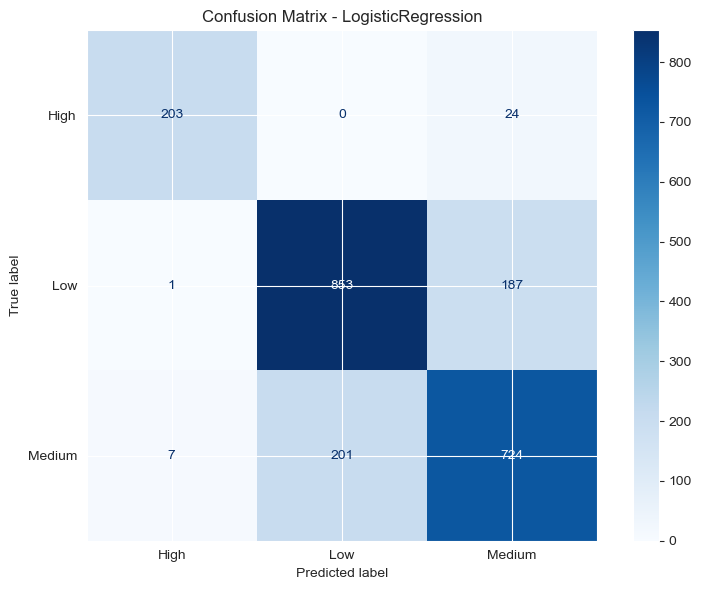


ВАЖЛИВІСТЬ ОЗНАК ДЛЯ LogisticRegression
                          Feature    Importance
              Stress Level (1-10)  2.682273e-01
                      Sleep Hours  4.109091e-02
     Therapy Sessions (per month)  3.840909e-02
         Caffeine Intake (mg/day)  1.440909e-02
        Family History of Anxiety  5.409091e-03
     Physical Activity (hrs/week)  2.863636e-03
              Diet Quality (1-10)  1.909091e-03
                              Age  1.545455e-03
                           Gender  8.636364e-04
                          Smoking  4.090909e-04
                        Dizziness  2.272727e-04
          Recent Major Life Event  1.818182e-04
                       Medication  4.545455e-05
             Sweating Level (1-5) -1.110223e-17
                 Heart Rate (bpm) -1.818182e-04
     Breathing Rate (breaths/min) -4.090909e-04
Alcohol Consumption (drinks/week) -4.545455e-04
                       Occupation -4.545455e-04


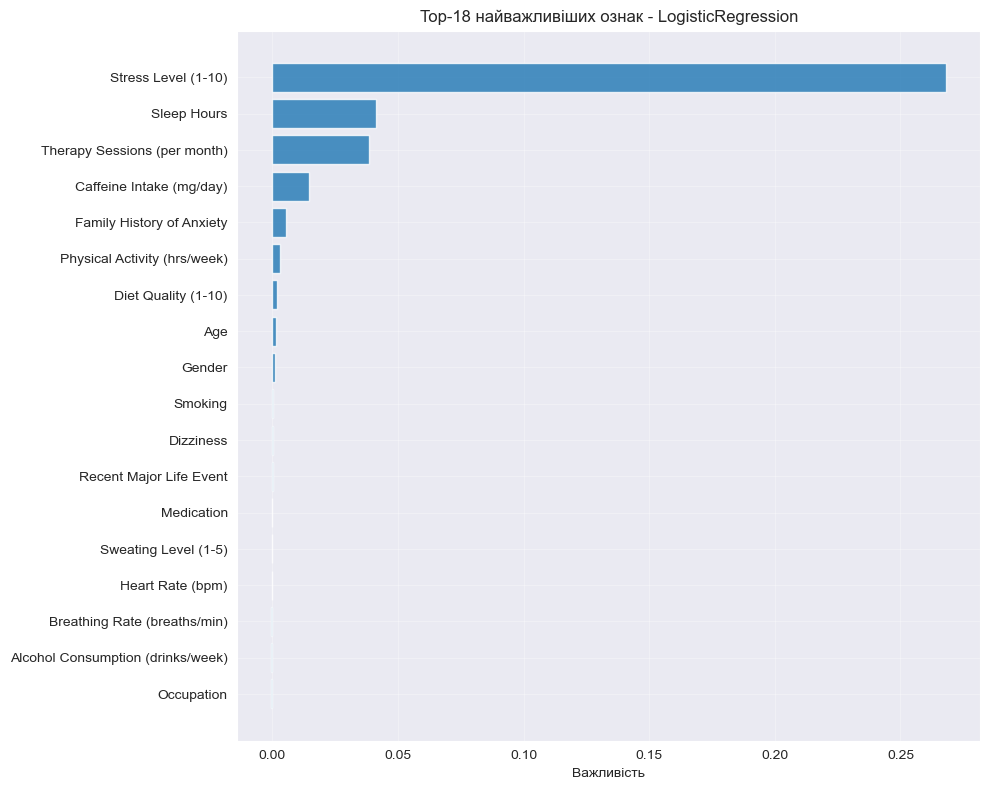

In [19]:
best_model_name = results_comparison.iloc[0]['Model']
best_model_obj = tuned_results[best_model_name]['model']

print("="*80)
print(f"ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩОЇ МОДЕЛІ: {best_model_name}")
print("="*80)

y_test_pred = best_model_obj.predict(X_test)

print("\nClassification Report на тестовій вибірці:")
print("-"*80)
print(classification_report(y_test, y_test_pred, target_names=le_y.classes_))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(f"ВАЖЛИВІСТЬ ОЗНАК ДЛЯ {best_model_name}")
print("="*80)

if best_model_name in feature_importance_dict:
    importances = feature_importance_dict[best_model_name]
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(feature_imp_df.to_string(index=False))
    
    top_n = min(20, len(feature_imp_df))
    plt.figure(figsize=(10, 8))
    plt.barh(range(top_n), feature_imp_df['Importance'].head(top_n), alpha=0.8)
    plt.yticks(range(top_n), feature_imp_df['Feature'].head(top_n))
    plt.xlabel('Важливість')
    plt.title(f'Top-{top_n} найважливіших ознак - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

АНАЛІЗ ПОМИЛКОВИХ ПЕРЕДБАЧЕНЬ

Кількість помилкових передбачень: 420 з 2200 (19.09%)

Перші 10 помилкових передбачень:
 Index True_Class Predicted_Class  Confidence
  7382     Medium             Low    0.871981
  3147     Medium             Low    0.618233
 10002     Medium             Low    0.551746
 10644        Low          Medium    0.568453
  4734        Low          Medium    0.555337
  2756        Low          Medium    0.814271
  8599        Low          Medium    0.530871
   826        Low          Medium    0.840767
  9240     Medium             Low    0.664879
     9     Medium             Low    0.605369

Розподіл помилкових передбачень:
True_Class Predicted_Class  Count
      High          Medium     24
       Low            High      1
       Low          Medium    187
    Medium            High      7
    Medium             Low    201


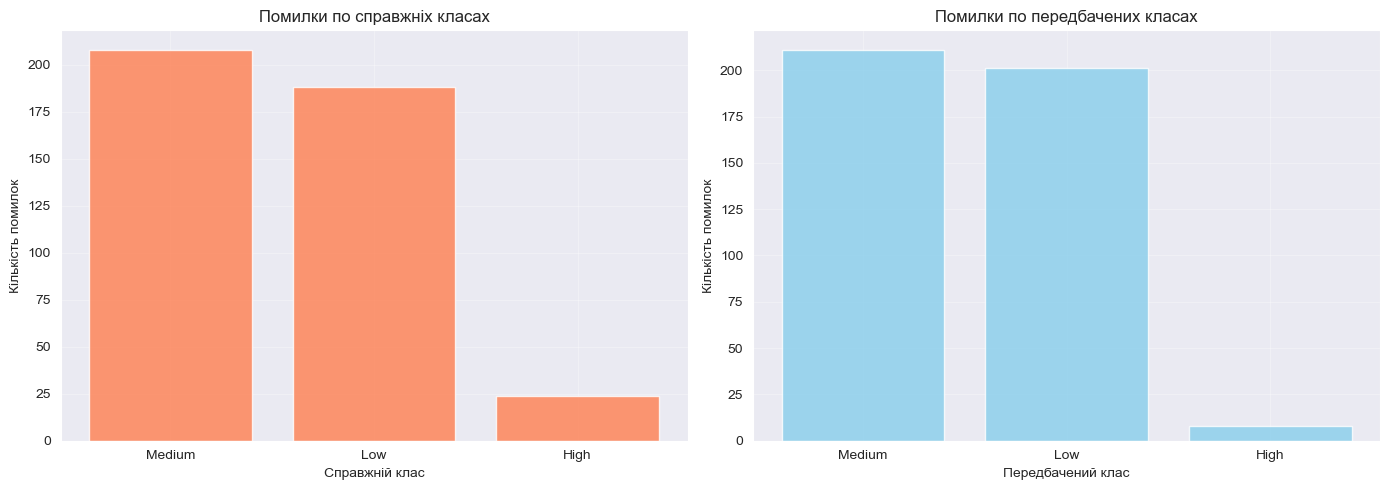

In [20]:
print("="*80)
print("АНАЛІЗ ПОМИЛКОВИХ ПЕРЕДБАЧЕНЬ")
print("="*80)

wrong_predictions = np.where(y_test != y_test_pred)[0]
print(f"\nКількість помилкових передбачень: {len(wrong_predictions)} з {len(y_test)} ({len(wrong_predictions)/len(y_test)*100:.2f}%)")

if len(wrong_predictions) > 0:
    errors_df = pd.DataFrame({
        'Index': X_test.iloc[wrong_predictions].index,
        'True_Class': le_y.inverse_transform(y_test[wrong_predictions]),
        'Predicted_Class': le_y.inverse_transform(y_test_pred[wrong_predictions])
    })
    
    if hasattr(best_model_obj, 'predict_proba'):
        proba = best_model_obj.predict_proba(X_test.iloc[wrong_predictions])
        errors_df['Confidence'] = proba.max(axis=1)
    
    print("\nПерші 10 помилкових передбачень:")
    print(errors_df.head(10).to_string(index=False))
    
    print("\nРозподіл помилкових передбачень:")
    error_distribution = errors_df.groupby(['True_Class', 'Predicted_Class']).size().reset_index(name='Count')
    print(error_distribution.to_string(index=False))
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1 = axes[0]
    true_class_errors = errors_df['True_Class'].value_counts()
    ax1.bar(true_class_errors.index, true_class_errors.values, alpha=0.8, color='coral')
    ax1.set_xlabel('Справжній клас')
    ax1.set_ylabel('Кількість помилок')
    ax1.set_title('Помилки по справжніх класах')
    ax1.grid(True, alpha=0.3)
    
    ax2 = axes[1]
    pred_class_errors = errors_df['Predicted_Class'].value_counts()
    ax2.bar(pred_class_errors.index, pred_class_errors.values, alpha=0.8, color='skyblue')
    ax2.set_xlabel('Передбачений клас')
    ax2.set_ylabel('Кількість помилок')
    ax2.set_title('Помилки по передбачених класах')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()